<a href="https://colab.research.google.com/github/Tujianis/AI_Final/blob/main/SeoulBikeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split


In [84]:
bikes = pd.read_csv('https://raw.githubusercontent.com/Tujianis/AI_Final/main/SeoulBikeData.csv', delimiter=',', error_bad_lines=False, encoding='unicode_escape')

In [85]:
bikes

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [86]:
bikes.pop('Date')

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object

In [87]:
def season_replace(x):
  if x["Seasons"] == "Spring":
    return 1
  elif x["Seasons"] == "Summer":
    return 2
  elif x["Seasons"] == "Fall":
    return 3
  else:
    return 4
def holiday_replace(x):
  if x['Holiday'] == "No Holiday":
    return 0
  else:
    return 1
def fd_replace(x):
  if x['Functioning Day'] == 'No':
    return 0
  else:
    return 1
bikes['Seasons'] =bikes.apply(season_replace, axis=1)
bikes['Holiday'] = bikes.apply(holiday_replace, axis=1)
bikes['Functioning Day'] = bikes.apply(fd_replace, axis=1)
bikes.dropna()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,1


In [268]:
bikes.head(25)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,4,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,4,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,4,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,4,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,4,0,1
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,4,0,1
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,4,0,1
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,4,0,1
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,4,0,1
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,4,0,1


In [303]:

train_dataset = bikes.sample(frac=0.8, random_state=0)
test_dataset = bikes.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Rented Bike Count')
test_labels = test_features.pop('Rented Bike Count')

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [355]:
dnn_model = keras.Sequential([
      normalizer, 
      layers.Dense(25, activation='relu'),
      layers.Dropout(.1),
      layers.Dense(50, activation='relu'),
      layers.Dropout(.1),
      layers.Dense(25, activation='relu'),
      layers.Dense(1)
  ])
dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adamax(0.01))
dnn_model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_11 (Normalizat (None, 12)                25        
_________________________________________________________________
dense_163 (Dense)            (None, 25)                325       
_________________________________________________________________
dropout_79 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_164 (Dense)            (None, 50)                1300      
_________________________________________________________________
dropout_80 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_165 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_166 (Dense)            (None, 1)               

In [356]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.25,
    verbose=0, epochs=600)

CPU times: user 2min 3s, sys: 12.8 s, total: 2min 16s
Wall time: 1min 37s


In [357]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
595,162.994751,167.606201,595
596,161.044266,170.142929,596
597,160.381393,165.423996,597
598,158.653412,170.874161,598
599,164.096848,158.528854,599


In [358]:
test_predictions = dnn_model.predict(test_features).flatten()

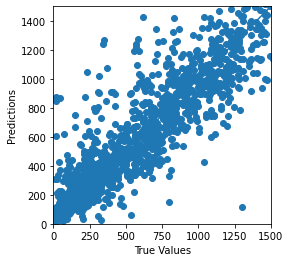

In [359]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


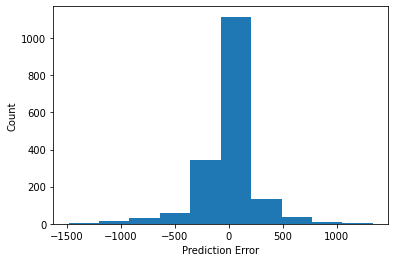

In [360]:
error = test_predictions - test_labels
plt.hist(error, bins=10)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

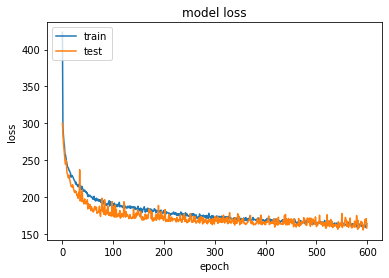

In [361]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [362]:
error = abs(error)
avg = error.sum()
print((avg/len(error)))

155.2119046917789
